<a href="https://colab.research.google.com/github/gbiamgaurav/Feature-Engineering/blob/main/Missing_values_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### `Random Sample Imputation`
`Aim` - Random Sample Imputation consists of taking random observations from the dataset and we use this observation to replace the NAN values.

`When it should be used ?` - It assumes that the data is missing completely at Random (MCAR)

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df = pd.read_csv(url, usecols=['Age', 'Fare', 'Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
### Check the % of missing values in df

df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [8]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [9]:
df['Age'].isnull().sum()

177

In [10]:
### choosing a random value
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [11]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [12]:
def impute_nan(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)
  df[variable+"_random"]=df[variable]

  ### It will have the random sample to fill the NAN
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)

  ### pandas needs to have the same index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [13]:
median = df.Age.median()

In [14]:
median

28.0

In [15]:
impute_nan(df, 'Age', median)

In [16]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

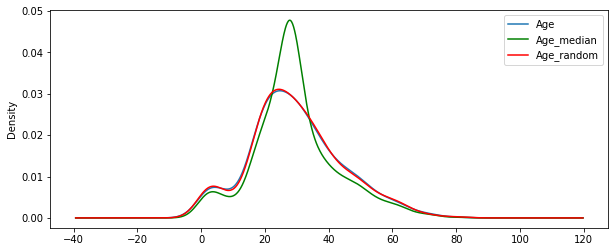

In [21]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='green')
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

#### Advantages :- 
* Easy to implement
* There is no distortion in variance

#### Disadvantages :- 
* In every situation Randomness wont work

`Capturing NAN values with a new feature`

It works well if the data is not missing completely at Random

In [22]:
df = pd.read_csv(url, usecols=['Age', 'Fare', 'Survived'])

In [23]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [26]:
df['Age_NAN'] = np.where(df['Age'].isnull(), 1,0)

In [27]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [28]:
df.Age_NAN.value_counts()

0    714
1    177
Name: Age_NAN, dtype: int64

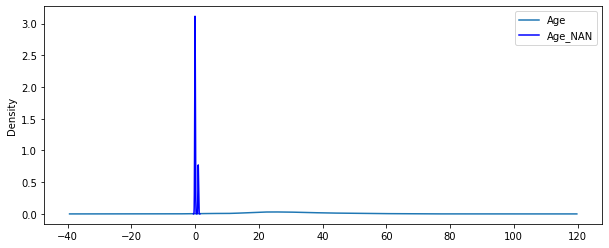

In [33]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_NAN.plot(kind="kde", ax=ax, color="blue")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

In [34]:
df.Age.median()

28.0

In [36]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [37]:
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages:- 
* Easy to implement
* Captures the importance of missing values

#### Disadvantage:- 
* It will create additional features, and it will lead to curse of Dimensionality

#### `End of Distribution imputation`

In [39]:
df = pd.read_csv(url, usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


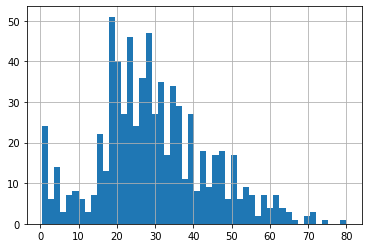

In [42]:
df.Age.hist(bins=50)

In [49]:
#### Pick the end value of the Distribution
#### We pick the value of 3rd stdev 
extreme = df.Age.mean()+3*df.Age.std()

In [46]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


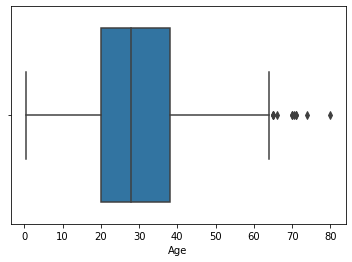

In [47]:
sns.boxplot('Age', data=df)

In [51]:
def impute_nan(df, variable, median, extreme):
  df[variable+"_end_distribution"]=df[variable].fillna(extreme)
  df[variable].fillna(median, inplace=True)

In [52]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [53]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


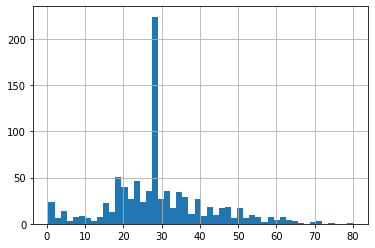

In [54]:
df['Age'].hist(bins=50)

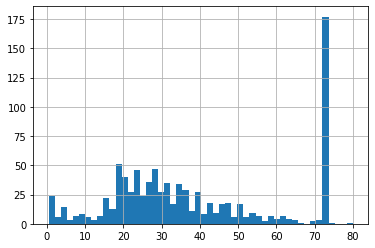

In [55]:
df['Age_end_distribution'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


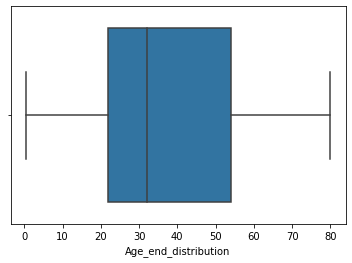

In [56]:
sns.boxplot('Age_end_distribution', data=df)

#### There is no Outliers 🥰

#### Advantages :- 
* Easy to implement
* Captures the importance of missingness if there is one

#### Disadvantages :-  
* Distorts the original distribution of the variable
* If the missing is not important, it may mask the predictive power of the original variable by distorting its distribution
* If the number of NAN is big, it will mask true outliers in the distribution
* If the number of NAN is small, the replaced NAN may be considered an Outlier and pre-processed in a subsequent feature engineering